In [4]:
import pandas as pd 
import numpy as np 

In [82]:
df_raw = pd.read_csv('./dataset/bank/bank-full.csv', sep=';')
df_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
df = df_raw[['age',
            'job',
            'marital',
            'education',
            'balance',
            'housing',
            'contact',
            'day',
            'month',
            'duration',
            'campaign',
            'pdays',
            'previous',
            'poutcome',
            'y'
            ]]
numeric = ['age',
            'balance',
            'day',
            'duration',
            'campaign',
            'pdays',
            'previous',]

In [88]:
from sklearn.model_selection import train_test_split
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=1)

y_train_val, y_test = train_test_split(df.y, test_size=0.2, random_state=1)
y_train, y_val = train_test_split(y_train_val, test_size=0.25, random_state=1)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

y_val_copy = []

for y in y_val:
    if y == 'no':
        y_val_copy.append(0) 
    else:
        y_val_copy.append(1) 
        

In [63]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
14137,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown
33506,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure
27524,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown
34058,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown
25922,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22520,32,technician,single,tertiary,195,yes,cellular,22,aug,239,2,-1,0,unknown
26678,52,self-employed,married,secondary,3720,no,cellular,20,nov,114,2,-1,0,unknown
4964,52,blue-collar,married,secondary,289,yes,unknown,21,may,45,13,-1,0,unknown
20083,32,management,married,tertiary,312,no,cellular,11,aug,67,4,-1,0,unknown


In [65]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[:].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)


In [66]:
X_train

array([[5.60e+01, 4.00e+01, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.30e+01, 4.79e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [3.20e+01, 3.92e+02, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [5.20e+01, 2.89e+02, 1.30e+01, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.20e+01, 3.12e+02, 4.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.80e+01, 5.80e+02, 6.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [93]:
val_dict = df_val[:].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
pred = y_pred > 0.5
print(y_pred)
print(round((y_val_copy == pred).mean(), 3))

[0.02915846 0.02367161 0.02150487 ... 0.23990718 0.00222657 0.03858971]
0.897


Q1.

In [102]:
for e in ['balance','day','duration','previous']:
   print(e)
   model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
   model.fit(np.array(df_train[e]).reshape(-1, 1), y_train)
   pred = model.predict_proba(np.array(df_val[e]).reshape(-1,1))[:, 1]
   print(roc_auc_score( y_val, pred > 0.5))


balance
0.5002665516539272
day
0.5
duration
0.5703937122700433
previous
0.5013956988537247


Q2. 

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[:].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
pred = y_pred > 0.5
print(y_pred)
print(round((y_val_copy == pred).mean(), 3))

[0.02915846 0.02367161 0.02150487 ... 0.23990718 0.00222657 0.03858971]
0.897


Q3. 

In [113]:
z = np.linspace(0, 1, 101)
precision = []
recall = []
from sklearn.metrics import precision_score, recall_score
for n in z:
    model = LogisticRegression(solver='liblinear', C=1, max_iter=1000)
    model.fit(X_train, y_train)
    val_dict = df_val[:].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict_proba(X_val)[:, 1]
    pred = y_pred > n
    p = precision_score(pred, y_val_copy)
    r = recall_score(pred, y_val_copy)
    precision.append(p)
    recall.append(r)

c:\Users\ChronDeager\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


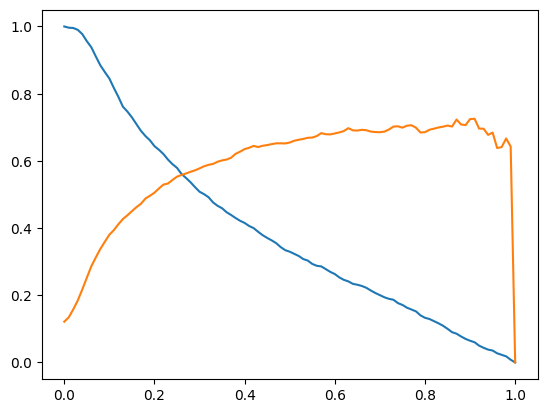

In [118]:
from matplotlib import pyplot as plt

plt.plot(z, precision)
plt.plot(z, recall)
plt.show()

Q4. 

In [124]:
parr = np.array(precision[:100])
rarr = np.array(recall[:100])

div = (parr + rarr)

print(div)

f1 = 2 * parr * rarr / div
f1.max()

[1.12143331 1.13075505 1.15364572 1.17475146 1.19465787 1.20838499
 1.22433937 1.22344225 1.2223094  1.22376842 1.2253451  1.21087928
 1.20190264 1.18835063 1.18484657 1.17976115 1.17178631 1.16167489
 1.16175752 1.15744279 1.14925897 1.15085279 1.14976757 1.13635526
 1.13333242 1.13227845 1.11899105 1.11168033 1.10386725 1.09371421
 1.08583647 1.08477487 1.08003857 1.06728103 1.06373527 1.06044837
 1.05111272 1.04833521 1.05092513 1.04904705 1.05039804 1.04516156
 1.04445809 1.03003003 1.02383191 1.01773278 1.01322511 1.00736517
 0.99560068 0.98610909 0.98430156 0.98316642 0.97979703 0.97318675
 0.97195339 0.96269914 0.96156998 0.96858319 0.95706508 0.94848014
 0.9448096  0.93791668 0.93467715 0.93871633 0.92492215 0.92154708
 0.92020748 0.91344035 0.90116    0.89254013 0.88572255 0.88108585
 0.88276867 0.88875789 0.87958343 0.87010516 0.86774809 0.86368165
 0.85083949 0.82469945 0.81841504 0.82200897 0.81882711 0.81602914
 0.811044   0.80531035 0.79229159 0.80868712 0.78574681 0.7765

np.float64(0.5713087248322147)

Q5. 

In [130]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

from tqdm.auto import tqdm
from sklearn.model_selection import KFold

y_copy = []

for y in df.y:
    if y == 'no':
        y_copy.append(0) 
    else:
        y_copy.append(1) 

In [131]:
df_train_val, df_test = train_test_split(y_copy.copy(), test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_val, test_size=0.25, random_state=1)
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_train_val):
    df_train = df_train_val.iloc[train_idx]
    df_val = df_train_val.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=1)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
print(np.mean(scores), np.std(scores))

AttributeError: 'list' object has no attribute 'iloc'